In [1]:
import pandas as pd

In [2]:
import geopandas as gpd

In [3]:
import folium

In [4]:
import plotly.express as px

In [5]:
import matplotlib.pyplot as plt

In [6]:
#load the excell file to pandas dataframe

In [7]:
file_path = "cleaned.xlsx"

In [8]:
try:
    data = pd.read_excel(file_path)
    print("file loaded successfully!")
    print("\nPreview of the data:")
    display(data.head())
except FileExistsError:
    print("File does not exist")
except Exception as e:
    print(f"An erroroccured while previewing{e}")

file loaded successfully!

Preview of the data:


,Date Entered\n(Enter the date the location was geocoded),Base/Sub-base,County,Road,Place,Crash Location\nCan a crash location be determined from the police data? \n* Yes\n* No,Location Type\nWhat does the location represent?\n* Point (~ within 300 meters)\n* Area (few km)\n,"Confident? \nAre you confident that the coordinates or road IDs you choose correctly identify the crash location?\n* Yes: The crash location was easy to find\n* No: The crash location was more difficult to find and there's a chance that the location I put may not be correct.\n\nNOTE 1: If you're VERY not confident in the crash location, do not put a location\n\nNOTE 2: While this colum appears before the location, fill this column out AFTER entering the location\n",Latitude,Longitude,Road Distance (kilometers),Comments
0,2025-02-02,makongeni,nairobi,along lunga lunga road,NEAR LUNGA LUNGA STAGE,Yes,Point,Yes,-1.308871,36.862347,NaN,NaN
1,2025-02-02,ruaraka,nairobi,along thika super highway,AT THE ALSOPS UNDER PASS STAGE,Yes,Point,Yes,-1.244967,36.867171,NaN,NaN
2,2025-02-02,buruburu,nairobi,outering road,STELL AREA NEXT TO FOOT BRIDGE,Yes,Point,Yes,-1.265617,36.879840,NaN,it's steel area not Stell
3,2025-02-02,kamkunji,nairobi,ladhies road,NEAR NASIKO,Yes,Point,Yes,-1.287347,36.837168,NaN,it's nacico cot nasiko
4,2025-02-02,kabete,nairobi,muhuri rd,NEAR KIHURO MARKET,No,NaN,NaN,NaN,NaN,NaN,there's no kihuro market in muhuri rd


In [9]:
print("column names after loading")
print(data.columns)

column names after loading
Index(['Date Entered\n(Enter the date the location was geocoded)',
       'Base/Sub-base', 'County', 'Road', 'Place',
       'Crash Location\nCan a crash location be determined from the police data? \n* Yes\n* No',
       'Location Type\nWhat does the location represent?\n* Point (~ within 300 meters)\n* Area (few km)\n',
       'Confident? \nAre you confident that the coordinates or road IDs you choose correctly identify the crash location?\n* Yes: The crash location was easy to find\n* No: The crash location was more difficult to find and there's a chance that the location I put may not be correct.\n\nNOTE 1: If you're VERY not confident in the crash location, do not put a location\n\nNOTE 2: While this colum appears before the location, fill this column out AFTER entering the location\n',
       'Latitude', 'Longitude', 'Road Distance (kilometers)', 'Comments'],
      dtype='object')


In [10]:
if data is not None:
    missing_summary = data.isnull().sum()
    print("summary of missing values:")
    display(missing_summary[missing_summary > 0])

summary of missing values:


Base/Sub-base                                                                                                                                                                                                                                                                                                                                                                                                                                                                             2
Road                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     11
Place                                           

In [11]:
if data is not None:
    print("column Names: ")
    print(data.columns)
    print("\nData Types:")
    print(data.dtypes)

column Names: 
Index(['Date Entered\n(Enter the date the location was geocoded)',
       'Base/Sub-base', 'County', 'Road', 'Place',
       'Crash Location\nCan a crash location be determined from the police data? \n* Yes\n* No',
       'Location Type\nWhat does the location represent?\n* Point (~ within 300 meters)\n* Area (few km)\n',
       'Confident? \nAre you confident that the coordinates or road IDs you choose correctly identify the crash location?\n* Yes: The crash location was easy to find\n* No: The crash location was more difficult to find and there's a chance that the location I put may not be correct.\n\nNOTE 1: If you're VERY not confident in the crash location, do not put a location\n\nNOTE 2: While this colum appears before the location, fill this column out AFTER entering the location\n',
       'Latitude', 'Longitude', 'Road Distance (kilometers)', 'Comments'],
      dtype='object')

Data Types:
Date Entered\n(Enter the date the location was geocoded)                

In [12]:
data["Latitude"] = pd.to_numeric(data["Latitude"], errors="coerce")
data["Longitude"] = pd.to_numeric(data["Longitude"], errors="coerce")

In [13]:
filtered_rows = data[data["Latitude"].notna() & data["Longitude"].notna()]

In [14]:
print(f"Number of rows with valid data in 'Latitude' and 'Longitude': {filtered_rows.shape[0]}")
display(filtered_rows)

Number of rows with valid data in 'Latitude' and 'Longitude': 526


,Date Entered\n(Enter the date the location was geocoded),Base/Sub-base,County,Road,Place,Crash Location\nCan a crash location be determined from the police data? \n* Yes\n* No,Location Type\nWhat does the location represent?\n* Point (~ within 300 meters)\n* Area (few km)\n,"Confident? \nAre you confident that the coordinates or road IDs you choose correctly identify the crash location?\n* Yes: The crash location was easy to find\n* No: The crash location was more difficult to find and there's a chance that the location I put may not be correct.\n\nNOTE 1: If you're VERY not confident in the crash location, do not put a location\n\nNOTE 2: While this colum appears before the location, fill this column out AFTER entering the location\n",Latitude,Longitude,Road Distance (kilometers),Comments
0,2025-02-02,makongeni,nairobi,along lunga lunga road,NEAR LUNGA LUNGA STAGE,Yes,Point,Yes,-1.308871,36.862347,NaN,NaN
1,2025-02-02,ruaraka,nairobi,along thika super highway,AT THE ALSOPS UNDER PASS STAGE,Yes,Point,Yes,-1.244967,36.867171,NaN,NaN
2,2025-02-02,buruburu,nairobi,outering road,STELL AREA NEXT TO FOOT BRIDGE,Yes,Point,Yes,-1.265617,36.879840,NaN,it's steel area not Stell
3,2025-02-02,kamkunji,nairobi,ladhies road,NEAR NASIKO,Yes,Point,Yes,-1.287347,36.837168,NaN,it's nacico cot nasiko
5,2025-02-02,buruburu,nairobi,along outhering road,NEAR HARMONY CLUB,Yes,Point,Yes,-1.266088,36.879939,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
659,2025-02-03,central,nairobi,along muranga over pass,NEAR KONJA ROUND ABOUT,Yes,Point,Yes,-1.281031,36.822210,NaN,NaN
660,2025-02-03,kabete,nairobi,along waiyaki way,OPPOSITE MOUNTAIN VIEW,Yes,Point,Yes,-1.261086,36.715100,NaN,NaN
663,2025-02-03,nakuru,nakuru,nairobi nakuru,ELEMENTAITA JUNCTION,Yes,Point,Yes,-0.317485,36.142717,NaN,NaN
664,2025-02-03,kamukunji,nairobi,along uyoma temple road,JUNCTION,Yes,Point,Yes,-1.286356,36.829606,NaN,NaN


In [15]:
import re

In [16]:
# Check if the "Road" column exists
if "Road" in filtered_rows.columns:
    # Print all unique road names before cleaning
    unique_road_names = filtered_rows["Road"].dropna().unique()
    print("Unique road names before cleaning:")
    print(unique_road_names)

    # Convert road names to lowercase for uniformity
    filtered_rows["Road"] = filtered_rows["Road"].str.lower()

    # Dictionary of standardized road names and their variations
    road_name_mapping = {
        "outering-road": [
            "outhering road ", "outering road", "outer ring road", "outering rd",
            "outerin rd", "outering", "along outering rd"
        ],
        "mombasa-road": [
            "mombasa nairobi", "mombasa-nairobi road", "mombasa road", "mombasa rd",
            "along mombasa nairobi", "mombasa-nairobi road",
            "along mombasa-nairobi highway"
        ],
        "juja-road": ["juja rd", "along juja road", "juja road"],
        "jogoo-road": ["jogoo", "along jogoo road", "jogoo road","jogoo rd"],
        "thika-road": [
            "along thika super highway", "thika super highway", "along thika road",
            "thika rd", "thika road"
        ],
        "ngong-road": [
            "along ngong road", "ngong", "ngong-road"
        ]
    }

    # Replace road name variations with standardized names
    for standard_name, variations in road_name_mapping.items():
        pattern = "|".join(map(re.escape, variations))  # Escape special characters
        filtered_rows.loc[
            filtered_rows["Road"].str.contains(pattern, na=False), "Road"
        ] = standard_name

    # Print all unique road names after cleaning
    print("\nUnique road names after cleaning:")
    cleaned_road_names = filtered_rows["Road"].dropna().unique()
    print(cleaned_road_names)

    print("\nRoad names have been standardized.")
    display(filtered_rows["Road"].value_counts())  # Display updated counts for each road

else:
    print("The 'Road' column is not present in the dataset.")

# Display a sample of the cleaned dataset
display(filtered_rows.head())


Unique road names before cleaning:
['along lunga lunga road' 'along thika super highway' 'outering road'
 'ladhies road' 'along outhering road' 'waiyaki way' 'baba dogo rd'
 'jogoo' 'river road' 'northern bypass' 'north airport' 'forest road'
 'mumias road' 'thika super highway' 'mombasa rd.' 'mombasa road'
 'southern by-pass' 'along eastern by pass road' 'uhuru highway'
 'along mombasa road' 'southlands off kitengela rd'
 'along outer ring road' 'along langata road' 'juja road' 'outering rd'
 'southern bypass' 'mombasa rd' 'juja rd' 'northern by pass'
 'professor wangari mathai road' 'along outering road' 'mihango'
 'along outering rd' 'thika super\n \n  highway' 'waruinge rd'
 'eastern bypass' 'thika rd' 'along wangare mathai road'
 'off muigai kenyatta road' 'along ngong road'
 'along northern bypass road' 'enterprise road' 'along moi avenue'
 'gariama road' 'along thika superhighway'
 'within bus station matatu termina' 'at umoja 2 slip road junction'
 'along southern bypass' 'nort

C:\Users\barra\AppData\Local\Temp\ipykernel_11988\2796147813.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rows["Road"] = filtered_rows["Road"].str.lower()


Road
outering-road                        73
mombasa-road                         42
thika-road                           18
jogoo-road                           12
ngong-road                            8
                                     ..
within bus station matatu termina     1
at umoja 2 slip road junction         1
southern by pass                      1
southern by-pass                      1
along old mombasa- nairobi road       1
Name: count, Length: 288, dtype: int64

,Date Entered\n(Enter the date the location was geocoded),Base/Sub-base,County,Road,Place,Crash Location\nCan a crash location be determined from the police data? \n* Yes\n* No,Location Type\nWhat does the location represent?\n* Point (~ within 300 meters)\n* Area (few km)\n,"Confident? \nAre you confident that the coordinates or road IDs you choose correctly identify the crash location?\n* Yes: The crash location was easy to find\n* No: The crash location was more difficult to find and there's a chance that the location I put may not be correct.\n\nNOTE 1: If you're VERY not confident in the crash location, do not put a location\n\nNOTE 2: While this colum appears before the location, fill this column out AFTER entering the location\n",Latitude,Longitude,Road Distance (kilometers),Comments
0,2025-02-02,makongeni,nairobi,along lunga lunga road,NEAR LUNGA LUNGA STAGE,Yes,Point,Yes,-1.308871,36.862347,NaN,NaN
1,2025-02-02,ruaraka,nairobi,thika-road,AT THE ALSOPS UNDER PASS STAGE,Yes,Point,Yes,-1.244967,36.867171,NaN,NaN
2,2025-02-02,buruburu,nairobi,outering-road,STELL AREA NEXT TO FOOT BRIDGE,Yes,Point,Yes,-1.265617,36.879840,NaN,it's steel area not Stell
3,2025-02-02,kamkunji,nairobi,ladhies road,NEAR NASIKO,Yes,Point,Yes,-1.287347,36.837168,NaN,it's nacico cot nasiko
5,2025-02-02,buruburu,nairobi,along outhering road,NEAR HARMONY CLUB,Yes,Point,Yes,-1.266088,36.879939,NaN,NaN


In [17]:
filtered_rows.to_excel("filtered_latitude_longitude_rows.xlsx", index=False)
print("Filtered rows saved to 'filtered_latitude_longitude_rows.xlsx'.")

Filtered rows saved to 'filtered_latitude_longitude_rows.xlsx'.


In [18]:
#Exploratory Data Analysis


In [19]:
print("summary statistics")
summary_starts = filtered_rows.describe()
display(summary_starts)

summary statistics


,Date Entered\n(Enter the date the location was geocoded),Latitude,Longitude
count,526,526.000000,526.000000
mean,2025-02-02 21:02:03.193916160,-1.596745,37.192854
min,2025-02-02 00:00:00,-4.321249,34.252672
25%,2025-02-03 00:00:00,-1.323360,36.838719
50%,2025-02-03 00:00:00,-1.284103,36.883834
75%,2025-02-03 00:00:00,-1.211461,37.110996
max,2025-02-03 00:00:00,-0.152735,39.821658
std,NaN,1.055778,1.166549


In [20]:
print("missing values in each column:")
missing_values = filtered_rows.isnull().sum()
display(missing_values)

missing values in each column:


Date Entered\n(Enter the date the location was geocoded)                                                                                                                                                                                                                                                                                                                                                                                                                                  0
Base/Sub-base                                                                                                                                                                                                                                                                                                                                                                                                                                                                             2
County                                          

In [21]:
duplicates = filtered_rows.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicates rows: {num_duplicates}")

Number of duplicates rows: 0


In [22]:
if num_duplicates > 0:
    display(filtered_rows, [duplicates])
else:
    print("no Duplicates rows found")

no Duplicates rows found


In [23]:
#geographical range(though not really applicatble here)
latitude_range = (filtered_rows["Latitude"].min(),filtered_rows["Latitude"].max())
longitude_range = (filtered_rows["Longitude"].min(), filtered_rows["Longitude"].max())

In [24]:
print(f"Latitude range: {latitude_range}")
print(f"Longitude range: {longitude_range}")

Latitude range: (np.float64(-4.32124899967608), np.float64(-0.152734621900448))
Longitude range: (np.float64(34.2526722721816), np.float64(39.8216583961189))


In [25]:
#frequency analysis
if "County" in filtered_rows.columns:
    print("Frequency of events by County:")
    county_counts = filtered_rows["County"].value_counts()
    display(county_counts)
else:
    print("'County'column not found in the dataset")

Frequency of events by County:


County
nairobi       321
mombasa        78
muranga        61
migori         24
nakuru         16
murang'a       15
makueni         7
muran'ga        3
muran'ga¬†      1
Name: count, dtype: int64

In [26]:
numeric_data = filtered_rows.select_dtypes(include=["number"]) # make sure to include the correct data type
if not numeric_data.empty: #and check if there are numeric in the column
    print("Correlation Matrix:")
    correlation_matrix = numeric_data.corr()
    display(correlation_matrix)
else:
    print("No numeric columns available for correlation.")

Correlation Matrix:


,Latitude,Longitude
Latitude,1.000000,-0.894762
Longitude,-0.894762,1.000000


In [27]:
if 'Road' in filtered_rows.columns:
    print("\nCrash Count by Road:")
    road_crash_count = filtered_rows.groupby('Road').size()
    display(road_crash_count.sort_values(ascending=False))


Crash Count by Road:


Road
outering-road                       73
mombasa-road                        42
thika-road                          18
jogoo-road                          12
juja-road                            8
                                    ..
along eastern bypass.                1
along eldoret road                   1
along enol- muranga road             1
along kitise-kiangine earth road     1
along expressway                     1
Length: 288, dtype: int64

In [ ]:
#Frequency of crash occurrences per road
print("\nTop 10 Roads with Most Crashes:")
road_frequencies = filtered_rows["Road"].value_counts().head(10)
display(road_frequencies)


Top 10 Roads with Most Crashes:


Road
outering-road            73
mombasa-road             42
thika-road               18
jogoo-road               12
ngong-road                8
juja-road                 8
waiyaki way               7
along northern bypass     5
kenol-sagana road         4
enterprise road           4
Name: count, dtype: int64

In [32]:
# Frequency of crash occurrences per place
print("\nTop 10 Places with Most Crashes:")
if "Place" in filtered_rows.columns:
    place_frequencies = filtered_rows["Place"].value_counts().head(10)
    display(place_frequencies)
else:
    print("The 'Place' column is not present in the dataset.")


Top 10 Places with Most Crashes:


Place
NEAR SHELL PETROL STATION         5
NEAR TOTAL PETROL STATION         4
MUTINDWA AREA                     4
NEAR MUTINDWA                     2
OPPOSITE CITAM CHURCH             2
DONHOLM UNDERPASS AREA            2
NEAR LUNGA LUNGA STAGE            2
AT THE ALSOPS UNDER PASS STAGE    2
STELL AREA NEXT TO FOOT BRIDGE    2
NEAR NASIKO                       2
Name: count, dtype: int64

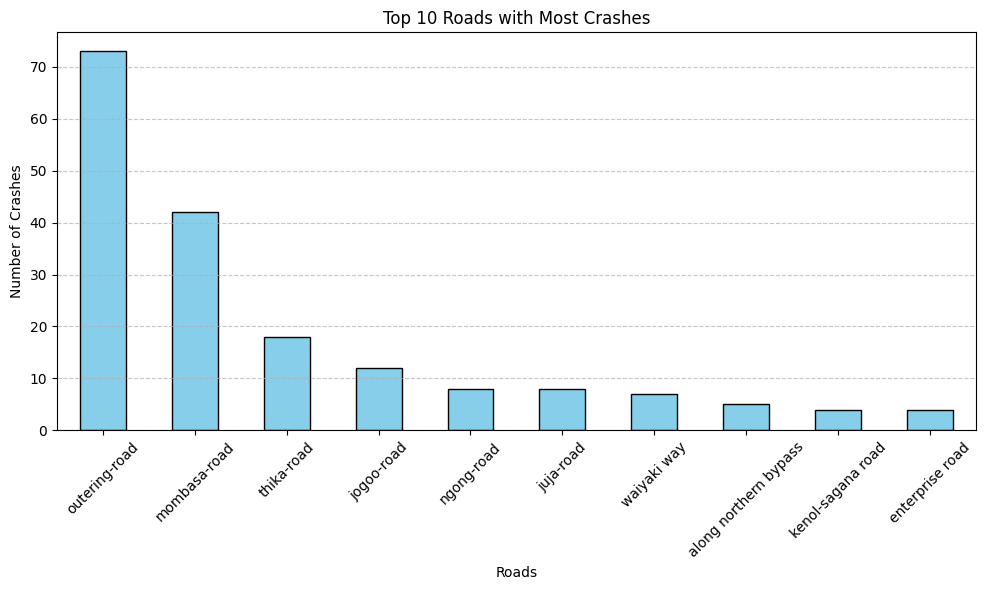

In [33]:
# Visualize top 10 roads with most crashes
plt.figure(figsize=(10, 6))
road_frequencies.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 10 Roads with Most Crashes")
plt.xlabel("Roads")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

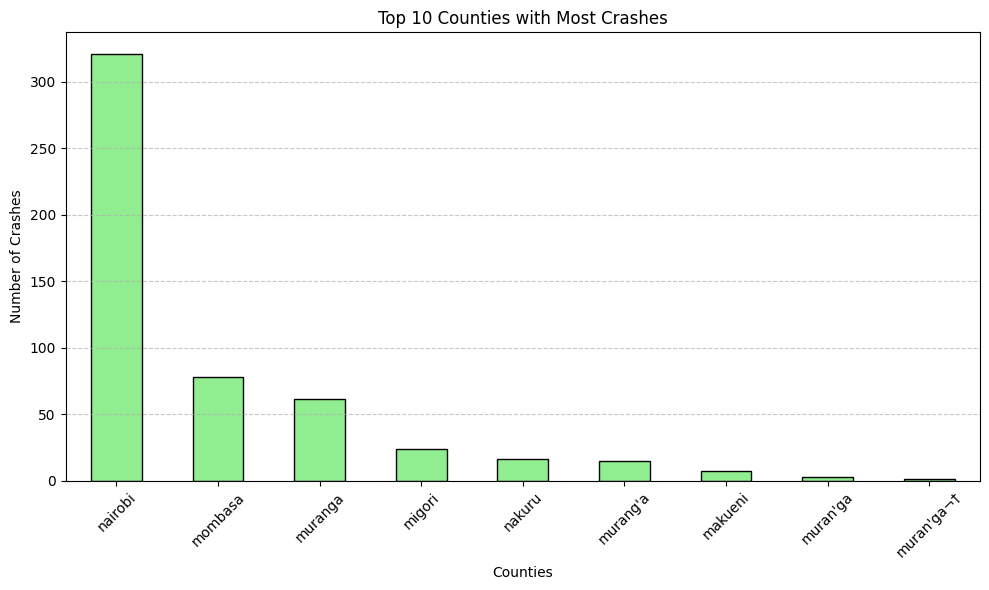

In [34]:
# Visualize top 10 counties with most crashes
if "County" in filtered_rows.columns:
    plt.figure(figsize=(10, 6))
    county_frequencies.plot(kind="bar", color="lightgreen", edgecolor="black")
    plt.title("Top 10 Counties with Most Crashes")
    plt.xlabel("Counties")
    plt.ylabel("Number of Crashes")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

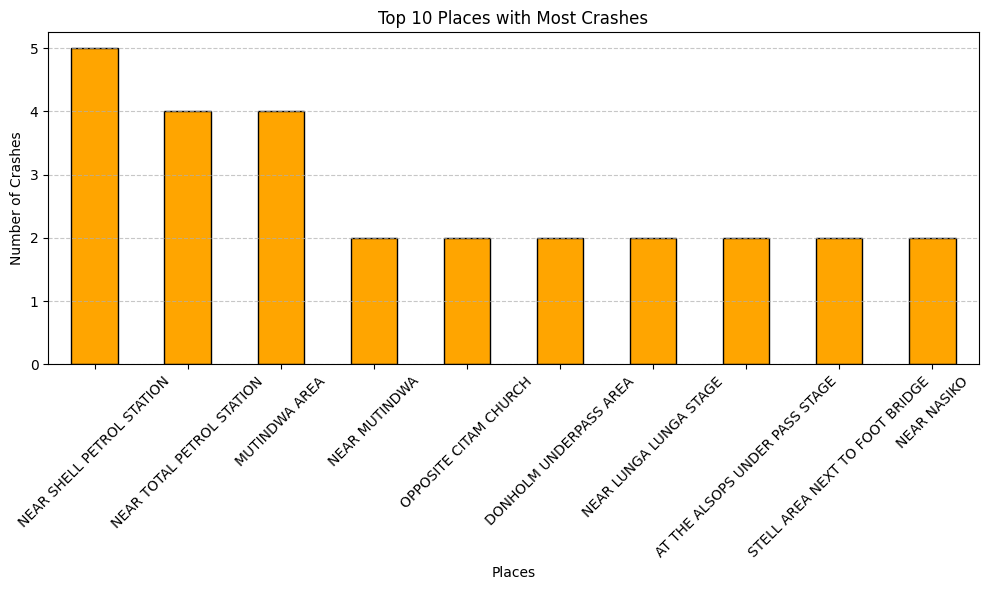

In [35]:
# Visualize top 10 places with most crashes
if "Place" in filtered_rows.columns:
    plt.figure(figsize=(10, 6))
    place_frequencies.plot(kind="bar", color="orange", edgecolor="black")
    plt.title("Top 10 Places with Most Crashes")
    plt.xlabel("Places")
    plt.ylabel("Number of Crashes")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

C:\Users\barra\AppData\Local\Temp\ipykernel_11988\3176939884.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rows["Date"] = pd.to_datetime(
c:\Users\barra\Desktop\Road-crash\.venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


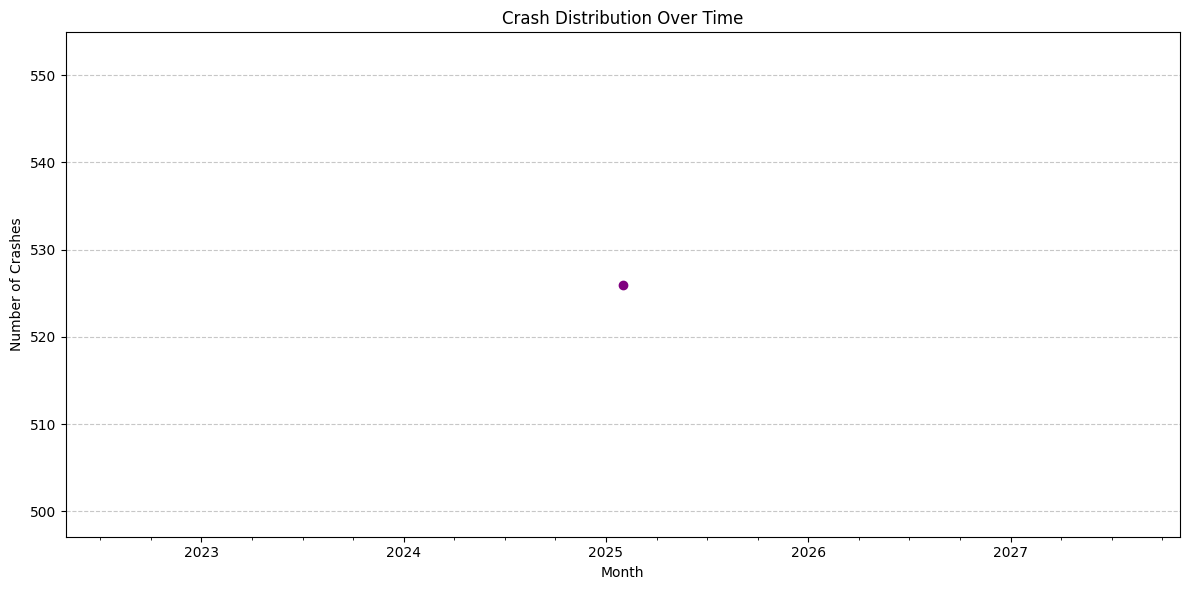

In [36]:
# Convert date column to datetime if not already(this is not applicable since he dates are for geocoding not when the date the accidenyt happened. but I just worked with it)
if "Date Entered\n(Enter the date the location was geocoded)" in filtered_rows.columns:
    filtered_rows["Date"] = pd.to_datetime(
        filtered_rows["Date Entered\n(Enter the date the location was geocoded)"], errors="coerce"
    )
    # Plot crashes over time
    crashes_per_month = filtered_rows["Date"].dt.to_period("M").value_counts().sort_index()

    plt.figure(figsize=(12, 6))
    crashes_per_month.plot(kind="line", marker="o", color="purple")
    plt.title("Crash Distribution Over Time")
    plt.xlabel("Month")
    plt.ylabel("Number of Crashes")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

In [38]:
import seaborn as sns

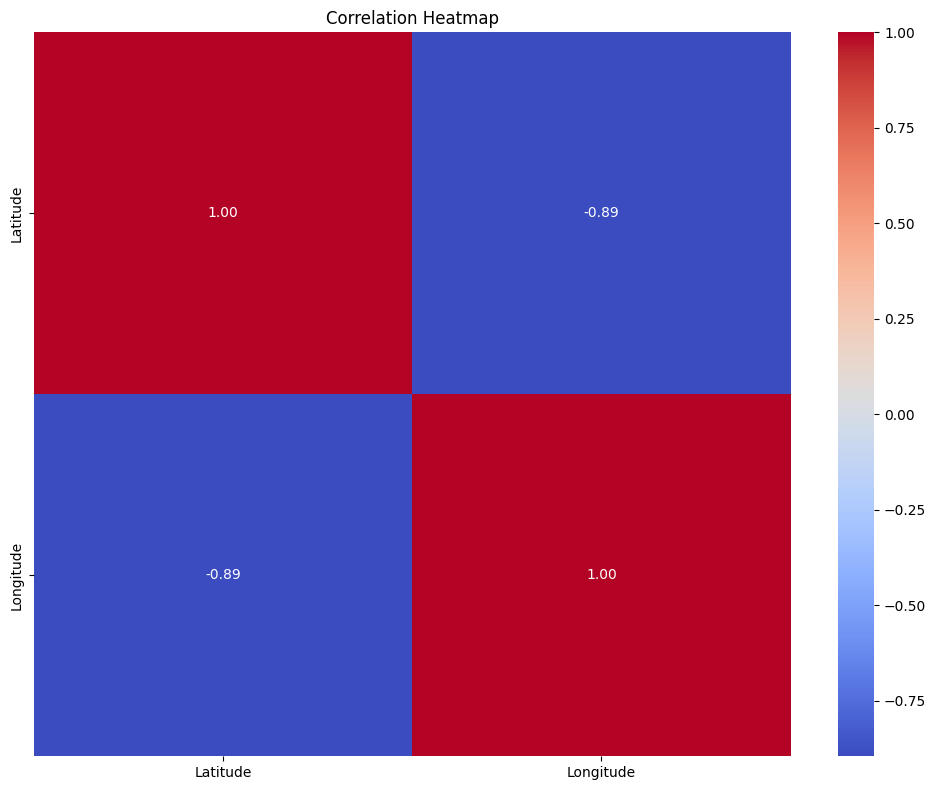

In [39]:
plt.figure(figsize=(10, 8))
correlation_matrix = filtered_rows.corr(numeric_only=True)  # Include only numeric columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [40]:
if "Confident? \nAre you confident that the coordinates or road IDs you choose correctly identify the crash location?" in filtered_rows.columns:
    plt.figure(figsize=(10, 6))
    filtered_rows["Confident? \nAre you confident that the coordinates or road IDs you choose correctly identify the crash location?"].value_counts().plot(
        kind="barh", color="teal", edgecolor="black"
    )
    plt.title("Confidence in Crash Location Identification")
    plt.xlabel("Number of Responses")
    plt.ylabel("Confidence Level")
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

In [41]:
if "Confident? \nAre you confident that the coordinates or road IDs you choose correctly identify the crash location?" in filtered_rows.columns:
    plt.figure(figsize=(10, 6))
    filtered_rows["Confident? \nAre you confident that the coordinates or road IDs you choose correctly identify the crash location?"].value_counts().plot(
        kind="barh", color="teal", edgecolor="black"
    )
    plt.title("Confidence in Crash Location Identification")
    plt.xlabel("Number of Responses")
    plt.ylabel("Confidence Level")
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

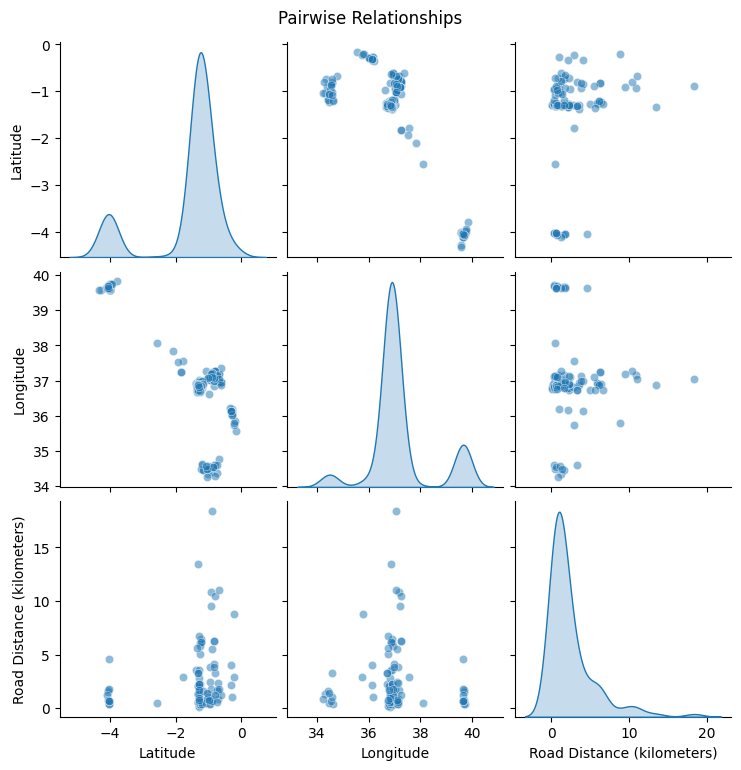

In [42]:
sns.pairplot(filtered_rows, diag_kind="kde", plot_kws={"alpha": 0.5})
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

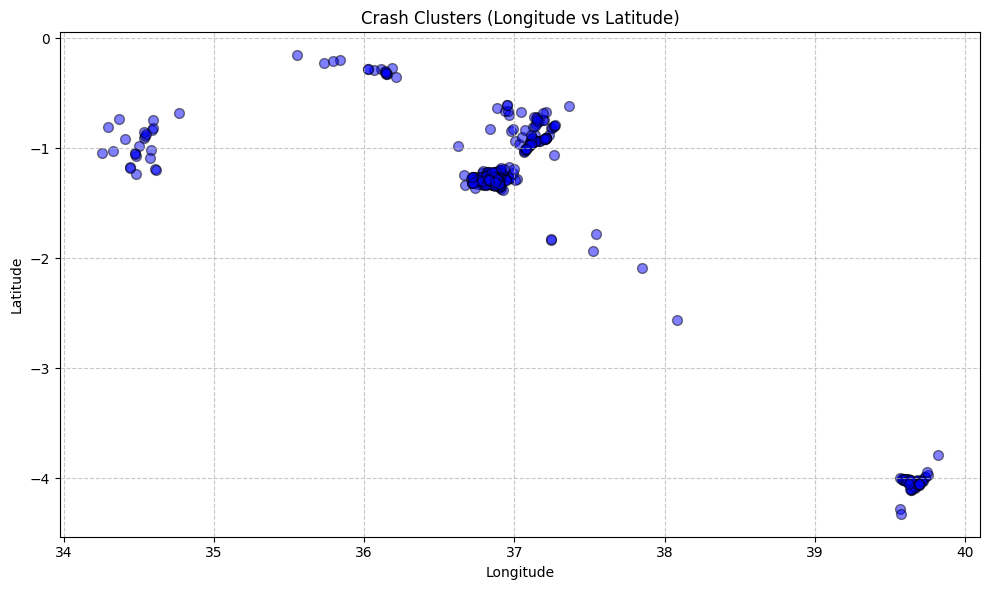

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(
    filtered_rows["Longitude"],
    filtered_rows["Latitude"],
    alpha=0.5,
    s=50,  # Adjust bubble size
    c="blue",
    edgecolor="black"
)
plt.title("Crash Clusters (Longitude vs Latitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\barra\AppData\Local\Temp\ipykernel_11988\2709662980.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


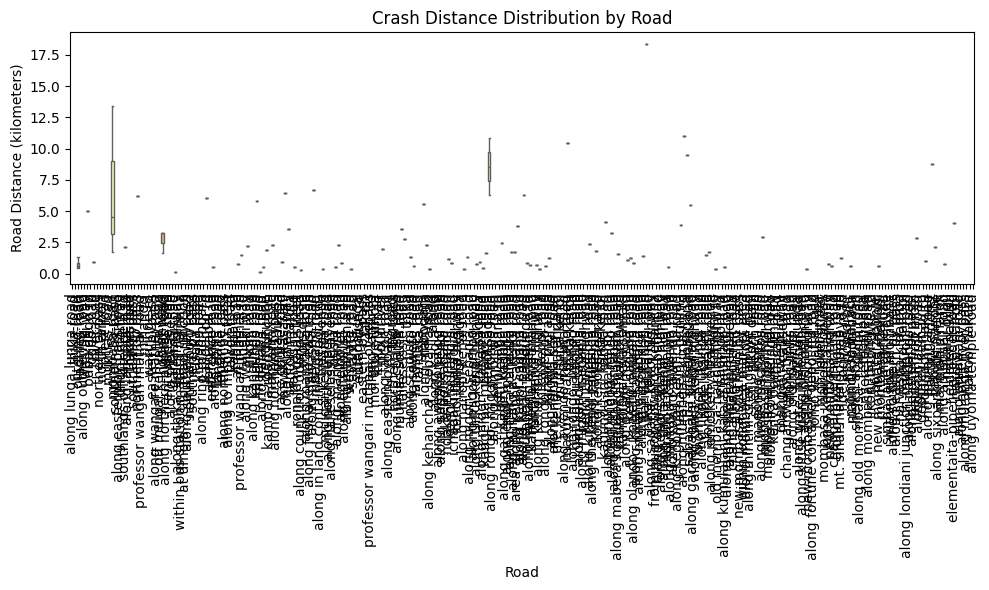

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=filtered_rows,
    x="Road",
    y="Road Distance (kilometers)",
    palette="Set3",
)
plt.xticks(rotation=90)
plt.title("Crash Distance Distribution by Road")
plt.tight_layout()
plt.show()

In [45]:
# Create a base map
if not filtered_rows.empty:
    # Center the map around the average latitude and longitude
    avg_lat = filtered_rows["Latitude"].mean()
    avg_lon = filtered_rows["Longitude"].mean()
    base_map = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)

    # Add crash points to the map
    for _, row in filtered_rows.iterrows():
        folium.CircleMarker(
            location=(row["Latitude"], row["Longitude"]),
            radius=5,
            color="red",
            fill=True,
            fill_color="red",
            fill_opacity=0.7,
        ).add_to(base_map)

    # Display the map
    base_map.save("crash_map.html")
    print("Crash map saved as 'crash_map.html'. Open it in your browser to view.")
else:
    print("No data available for geospatial mapping.")

Crash map saved as 'crash_map.html'. Open it in your browser to view.


In [46]:
from folium.plugins import MarkerCluster

# Create a base map
if not filtered_rows.empty:
    marker_cluster_map = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)

    # Create a marker cluster
    marker_cluster = MarkerCluster().add_to(marker_cluster_map)

    # Add crash points to the cluster
    for _, row in filtered_rows.iterrows():
        folium.Marker(
            location=(row["Latitude"], row["Longitude"]),
            popup=f"Road: {row['Road']}",
        ).add_to(marker_cluster)

    # Save the map
    marker_cluster_map.save("crash_cluster_map.html")
    print("Cluster map saved as 'crash_cluster_map.html'. Open it in your browser to view.")
else:
    print("No data available for geospatial mapping.")

Cluster map saved as 'crash_cluster_map.html'. Open it in your browser to view.


In [47]:
from folium.plugins import HeatMap

# Create a heatmap
if not filtered_rows.empty:
    heatmap_map = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)

    # Prepare data for heatmap (latitude, longitude)
    heat_data = filtered_rows[["Latitude", "Longitude"]].dropna().values.tolist()

    # Add heatmap layer
    HeatMap(heat_data, radius=10).add_to(heatmap_map)

    # Save the map
    heatmap_map.save("crash_heatmap.html")
    print("Heatmap saved as 'crash_heatmap.html'. Open it in your browser to view.")
else:
    print("No data available for geospatial mapping.")

Heatmap saved as 'crash_heatmap.html'. Open it in your browser to view.


In [48]:
from shapely.geometry import Point

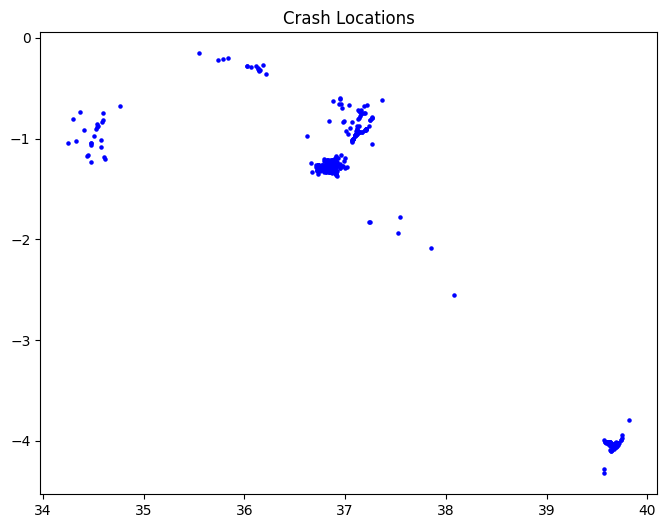

In [49]:
# Create a GeoDataFrame
if not filtered_rows.empty:
    geometry = [Point(xy) for xy in zip(filtered_rows["Longitude"], filtered_rows["Latitude"])]
    gdf = gpd.GeoDataFrame(filtered_rows, geometry=geometry)

    # Plot the GeoDataFrame
    gdf.plot(marker="o", color="blue", markersize=5, figsize=(10, 6))
    plt.title("Crash Locations")
    plt.show()
else:
    print("No data available for geospatial mapping.")

In [ ]:
#this is to measure the distance between crash points in nairobi and the city center
# Define Nairobi city center coordinates
nairobi_center = Point(36.8219, -1.2921)  # Longitude, Latitude for Nairobi city center

# Filter for rows with locations in Nairobi
nairobi_data = filtered_rows[
    filtered_rows["County"].str.contains("Nairobi", case=False, na=False)
]

if not nairobi_data.empty:
    # Calculate distance to Nairobi city center (in kilometers)
    nairobi_data["Distance_to_Center_km"] = nairobi_data.apply(
        lambda row: Point(row["Longitude"], row["Latitude"]).distance(nairobi_center) * 111,  # Convert degrees to kilometers
        axis=1,
    )

    # Display data with distances
    print("Distances to Nairobi city center calculated (in kilometers):")
    display(nairobi_data[["Road", "Latitude", "Longitude", "Distance_to_Center_km"]].head())

    # Map visualization


    # Create a folium map centered on Nairobi
    nairobi_map = folium.Map(location=[-1.2921, 36.8219], zoom_start=12)

    # Add crash points to the map
    for _, row in nairobi_data.iterrows():
        folium.CircleMarker(
            location=[row["Latitude"], row["Longitude"]],
            radius=5,
            color="blue",
            fill=True,
            fill_opacity=0.7,
            tooltip=f"Road: {row['Road']}, Distance: {row['Distance_to_Center_km']:.2f} km",
        ).add_to(nairobi_map)

    # Save map to HTML
    nairobi_map.save("nairobi_crashes.html")
    print("Map saved as 'nairobi_crashes.html'. Open it in your browser to view.")
else:
    print("No data available for Nairobi.")

Distances to Nairobi city center calculated (in kilometers):


C:\Users\barra\AppData\Local\Temp\ipykernel_11988\1971283678.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nairobi_data["Distance_to_Center_km"] = nairobi_data.apply(


,Road,Latitude,Longitude,Distance_to_Center_km
0,along lunga lunga road,-1.308871,36.862347,4.860264
1,thika-road,-1.244967,36.867171,7.254108
2,outering-road,-1.265617,36.879840,7.071333
3,ladhies road,-1.287347,36.837168,1.774957
5,along outhering road,-1.266088,36.879939,7.059785


Map saved as 'nairobi_crashes.html'. Open it in your browser to view.


Crash counts by road:
Road
outering-road                        73
mombasa-road                         42
thika-road                           18
jogoo-road                           12
ngong-road                            8
                                     ..
within bus station matatu termina     1
at umoja 2 slip road junction         1
southern by pass                      1
southern by-pass                      1
along old mombasa- nairobi road       1
Name: count, Length: 288, dtype: int64


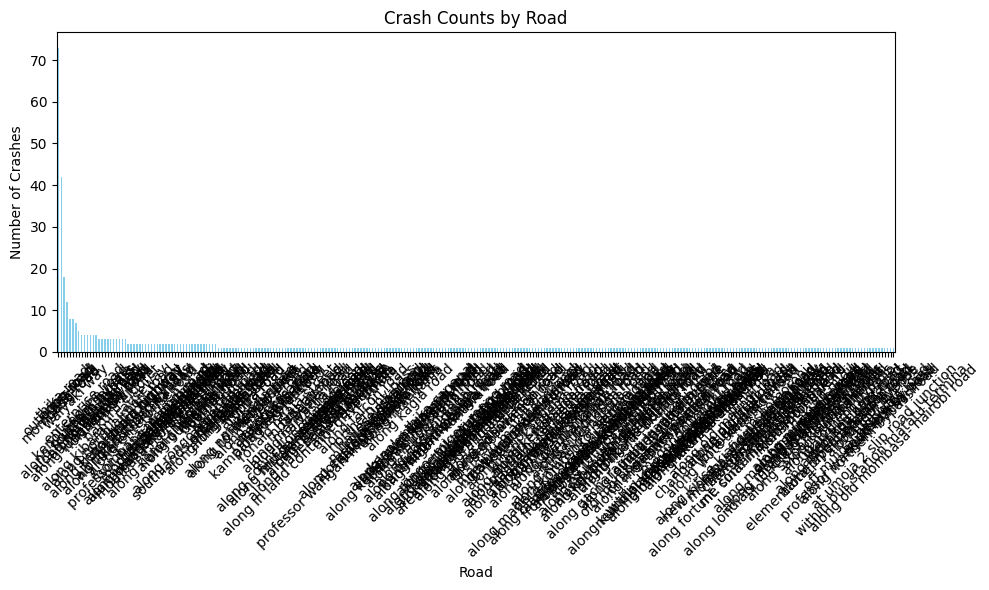

In [51]:
if not filtered_rows.empty:
    road_crash_counts = filtered_rows["Road"].value_counts()
    print("Crash counts by road:")
    print(road_crash_counts)

    # Visualize crash counts
    road_crash_counts.plot(kind="bar", figsize=(10, 6), title="Crash Counts by Road", color="skyblue")
    plt.xlabel("Road")
    plt.ylabel("Number of Crashes")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for road-specific crash density.")

In [53]:
from sklearn.cluster import DBSCAN

In [55]:
import numpy as np

In [56]:
# Prepare latitude and longitude data
coords = filtered_rows[["Latitude", "Longitude"]].dropna().values

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.01, min_samples=5, metric="haversine").fit(np.radians(coords))
filtered_rows["Cluster"] = dbscan.labels_

# Visualize clusters
clustered_map = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)
for cluster in filtered_rows["Cluster"].unique():
    cluster_data = filtered_rows[filtered_rows["Cluster"] == cluster]
    for _, row in cluster_data.iterrows():
        folium.CircleMarker(
            location=(row["Latitude"], row["Longitude"]),
            radius=5,
            color="blue" if cluster != -1 else "gray",  # Noise is labeled as -1
            fill=True,
            fill_color="blue" if cluster != -1 else "gray",
            fill_opacity=0.7,
        ).add_to(clustered_map)
clustered_map.save("crash_clusters.html")
print("Cluster map saved as 'crash_clusters.html'. Open it in your browser to view.")

C:\Users\barra\AppData\Local\Temp\ipykernel_11988\2256262633.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rows["Cluster"] = dbscan.labels_


Cluster map saved as 'crash_clusters.html'. Open it in your browser to view.
